<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import t
import csv
import pandas as pd
import pprint
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
#Create a Dictionary
pathfile= './sat_scores.csv'

data = pd.read_csv(pathfile)
dict_data = data.to_dict('list')


### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
# Dataframe object from the SAT Dictionary
data_from_dict = pd.DataFrame.from_dict(dict_data)
data_from_dict.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [4]:
# Data Dataframe from .read_csv()
sat_score = pd.read_csv(pathfile)
sat_score.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [5]:
sat_score[['Rate','Verbal','Math']].astype(float, inplace=True).head(3)

,Rate,Verbal,Math
0,82.0,509.0,510.0
1,81.0,499.0,513.0
2,79.0,511.0,515.0


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
# first 10 rows of the data
sat_score.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [7]:
# bottom 5 rows of the data
sat_score.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


There is a row containing 'State : All' at the end of the dataframe which is providing the overall statistic. 

In [8]:
# There is a State : All at the end of the dataframe which does not have any relation with the above dataset.
sat_score.drop(sat_score.tail(1).index,axis=0,inplace=True)
sat_score.shape

(51, 4)

In [9]:
sat_score.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


The data is collected for **51** different states. # average participation rate of **37**, average verbal score of **532.5**, and average math score of **531.84**

In [10]:
# checking for null values
sat_score.isnull().sum()

State     0
Rate      0
Verbal    0
Math      0
dtype: int64

There are no null value in the data

In [11]:
sat_score['State'].nunique()

51

In [12]:
#using rp.summary for Continous varibale
rp.summary_cont(sat_score[['Rate','Verbal','Math']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Rate,51.0,37.000000,27.550681,3.857867,29.251246,44.748754
1,Verbal,51.0,532.529412,33.360667,4.671428,523.146573,541.912251
2,Math,51.0,531.843137,36.287393,5.081251,521.637143,542.049131


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.



    1. State   	String         abbreviation for representing a US state
    2. Rate    	integer		Participation Rate in a particular state, %age
    3. Verbal  	integer		mean verbal score in a state
    4. Math        integer		mean math score in a state



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

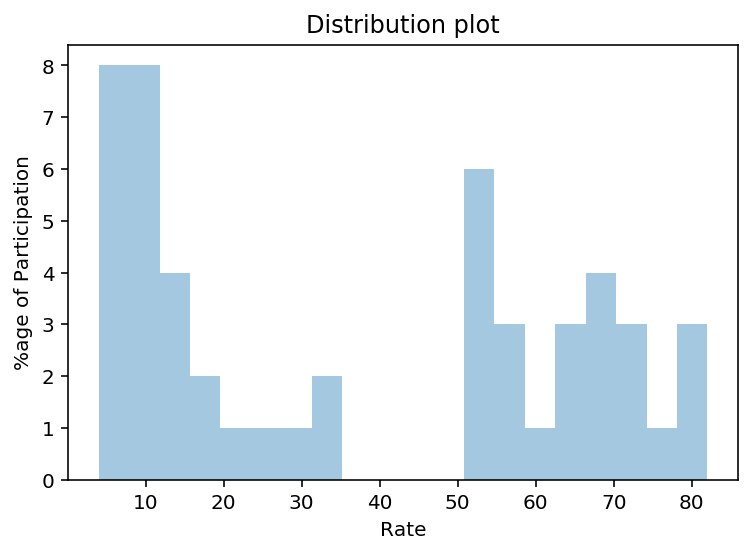

In [13]:
ax=sns.distplot(sat_score['Rate'],kde = False, bins= 20);
ax.set(xlabel='Rate', ylabel='%age of Participation',title ='Distribution plot');

As we can see there Rate of participation among various states is not normally distributed

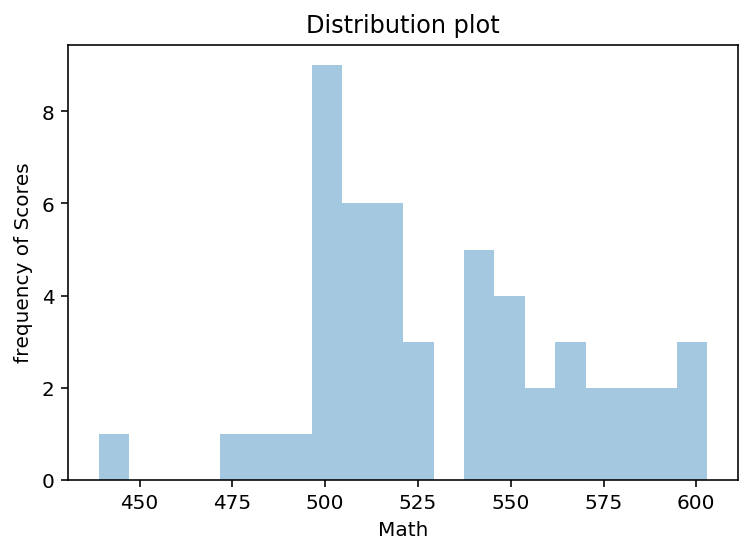

In [14]:
ax=sns.distplot(sat_score['Math'],kde = False, bins= 20);
ax.set(xlabel='Math', ylabel='frequency of Scores',title ='Distribution plot');

The above graph shows that majority score achieved in math was 490 approx. The max scores in maths are 603.

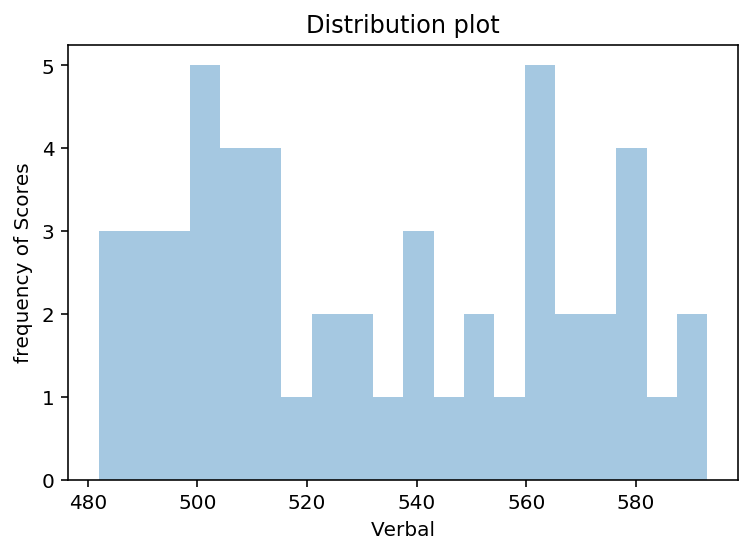

In [15]:
ax=sns.distplot(sat_score['Verbal'],kde = False, bins= 20);
ax.set(xlabel='Verbal', ylabel='frequency of Scores',title ='Distribution plot');

The above graph is having a wide spread with many peaks at 500 and 560. The max scores in verbal is 593.

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

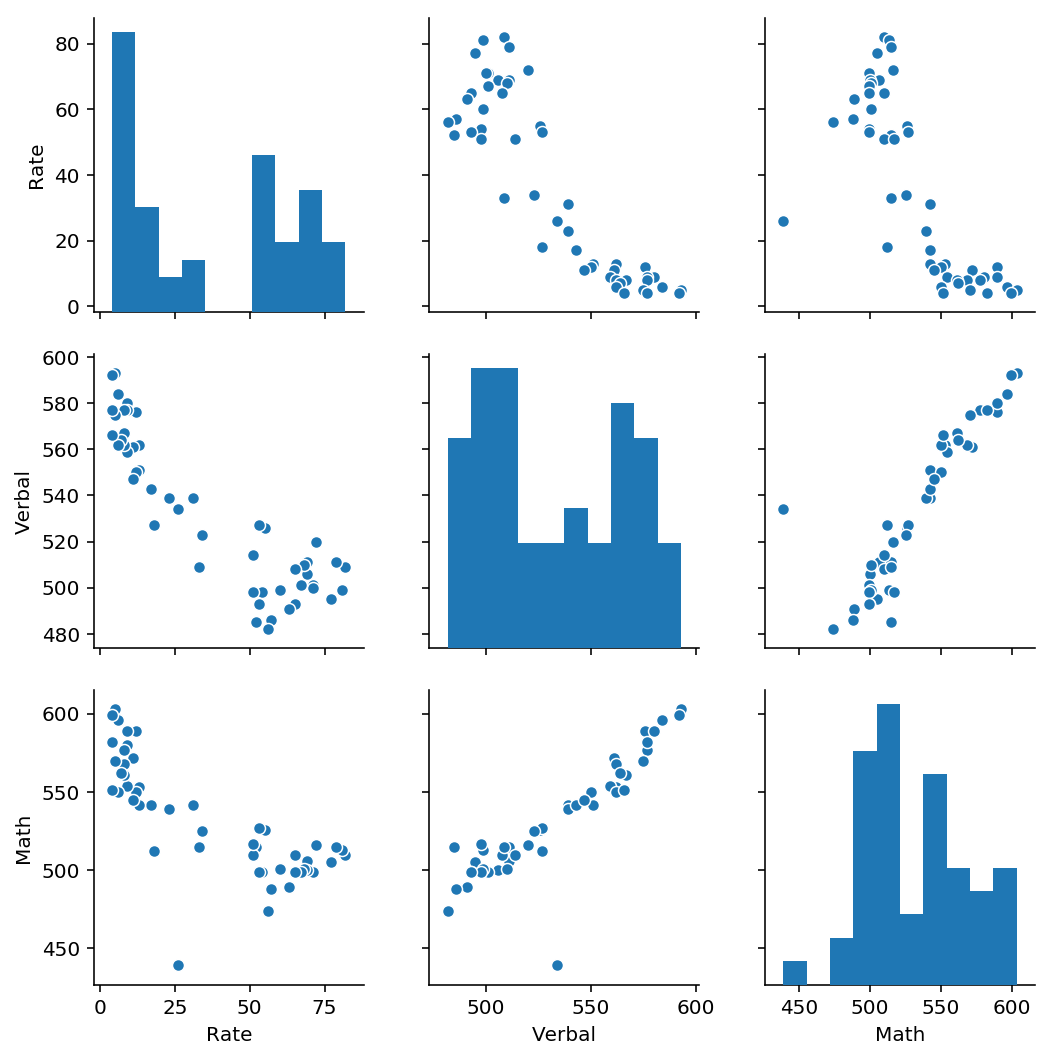

In [16]:
ax=sns.pairplot(sat_score)


As we can see in the pairplot:

1. Verbal scores and Math scores are positively correlated

2. Participation rate and Verbal scores seem to be negatively correlated

3. Participation rate and math scores seem to be negatively correlated

4. The relationship between Verbal scores and Math scores are strong than the relationship between Participation Rate and either of the scores

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

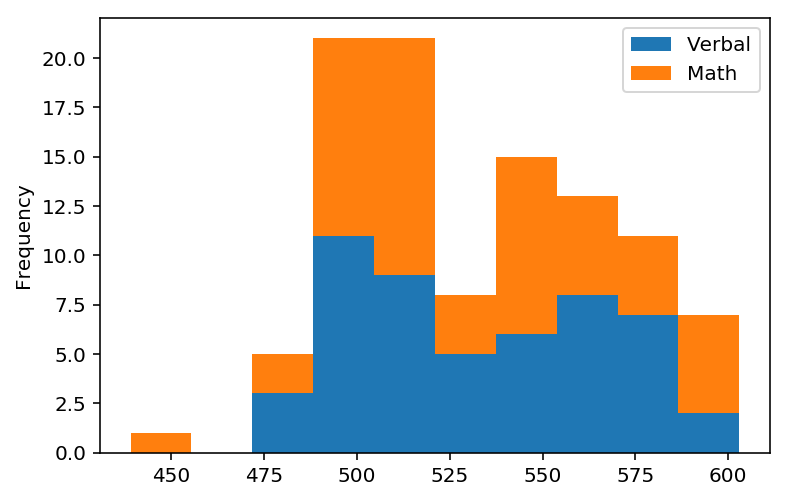

In [17]:
sat_score[['Verbal','Math']].plot(kind= 'hist',stacked= True)

The Verbal Scores are lesser in all cities in comparison to maths scores

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

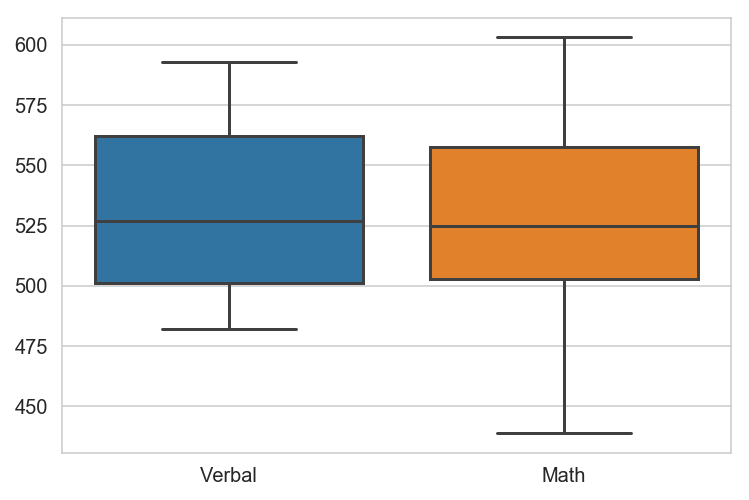

In [16]:
#box plot of 2 variable and then for 3 variables
sns.set_style("whitegrid")
sns.boxplot(data = sat_score[['Verbal','Math']]);

The Verbal scores have a smaller range with a median of 526, Min of 482 and max of 580. The Maths score had a min score of 439 and max of 603. 

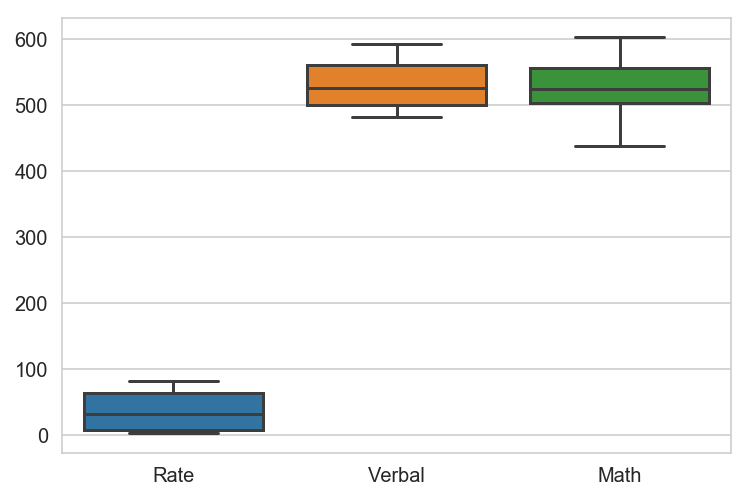

In [17]:
sns.set_style("whitegrid")
sns.boxplot(data=sat_score[['Rate','Verbal','Math']])

As shown in the above boxplot the median Rate is 34 approx and for Verbal and Math is near 550. 
It's because we are plotting variable from different scale.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [18]:
verbal_score_mean = sat_score['Verbal'].mean()

count_verbal_mean = 0
for index,entry in sat_score.iterrows():
    if entry['Verbal'] > verbal_score_mean:
        count_verbal_mean = count_verbal_mean + 1
print(count_verbal_mean)

24


24 are above the mean , this means that the distribution is close to normal.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [19]:
verbal_score_median = sat_score['Verbal'].median()

count_verbal_median = 0
for index,entry in sat_score.iterrows():
    if entry['Verbal'] > verbal_score_median:
        count_verbal_median = count_verbal_median+ 1
print(count_verbal_median)

24


24 are above the median out of 51. Because we dont have 
outliers the distribution is balanced and median is close to our mean.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [20]:
data_n = sat_score.iloc[:,[0,1,2,3]]

In [21]:
data_n['diff_bet_score']= sat_score['Verbal'] - sat_score['Math']

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [22]:
data_n[data_n['diff_bet_score']==95]

,State,Rate,Verbal,Math,diff_bet_score
27,OH,26,534,439,95


In [23]:
dataFrame1=data_n.sort_values(by=['diff_bet_score'],ascending=False).head(10)
dataFrame1.head(3)

,State,Rate,Verbal,Math,diff_bet_score
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


The max difference was observed in Ohio state with a difference of 95 where students had high sat_scores in Verbal. Mississipi and West Virginia had a difference of 15 .

In [24]:
dataFrame2=data_n.sort_values(by=['diff_bet_score']).head(10)
dataFrame2.head(3)

,State,Rate,Verbal,Math,diff_bet_score
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


Hawai had a the maximimum difference, wont be wrong saying students performed well in maths in comparison to verbal. California and New Jersey students also did well in maths in compariosn to verbal. 

But, still on the other hand there are states who had a difference of 10 but still have the highest overall sat_scores Iowa with Verbal scores of 593 and Maths scores 603.

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [25]:
data.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


From the above correlation matrix :
    1. The Rate is negatively correlated with Verbal and Maths score.
    2. On the other hand Math Score and Verbal Score are highly positively correlated.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [28]:
sat_score.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


The data is collected for 51 different states. # average participation rate of 37, average verbal score of 532.5, and average math score of 531.84

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [26]:
data.cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


Covariance is a measure of relationship between 2 variables. It measures the degree of change in the variables, 
i.e. when one variable changes, will there be the same/a similar change in the other variable.

The measure of correlation overcomes the scale dependency of covariance by standardizing the measures. 
Standardizing measures makes it so the variables are on the same scale of measurement. 
The values are standardized which converts them into Z-scores. 
A Z-score is a standardized measure which measures variability from the mean.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [27]:
pathfile=('./drug-use-by-age.csv')
drugs = pd.read_csv(pathfile)

In [28]:
drugs.shape

(17, 28)

In [29]:
#Does this data require cleaning?

# The dataset requires Data Cleaning as it contains hypen('-') 
drugs.T [7:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
cocaine-frequency,5.0,1.0,5.5,4.0,7.0,5.0,5.0,5.5,8.0,5.0,5.0,6.0,5.0,8.0,15.0,36.0,-
crack-use,0,0,0,0.1,0,0.1,0.4,0.5,0.6,0.5,0.5,0.5,0.4,0.5,0.5,0.4,0
crack-frequency,-,3.0,-,9.5,1.0,21.0,10.0,2.0,5.0,17.0,5.0,6.0,6.0,15.0,48.0,62.0,-


In [30]:
#Age Column is a range

drugs['age']

0        12
1        13
2        14
3        15
4        16
5        17
6        18
7        19
8        20
9        21
10    22-23
11    24-25
12    26-29
13    30-34
14    35-49
15    50-64
16      65+
Name: age, dtype: object

In [31]:
# Created a function to convert interval to average age
def converter(value):
    if '+' in value:
        return (float(value[:-1]))
    elif '-' in value:
        return ( (float(value[-2:]) + float(value[:2])) / 2 ) 
    else:
        return value

drugs['avg_age'] = (drugs['age'].apply(converter)).astype(float)

In [32]:
drugs.tail(2)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,avg_age
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0,57.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0,65.0


In [36]:
# Are variables missing?

# There are no null values as hyphen(-) is considered as an object

drugs.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
avg_age                    0
dtype: int64

In [33]:
# for cleaning purposes I have replaced the hypen ('-') with (0). 

drugs.replace('-','0.0',inplace = True)

In [34]:
drugs.tail(2)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,avg_age
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0,57.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,0.0,0.0,0.0,...,0.0,0.2,5.0,0.0,364.0,0.0,0.0,0.0,15.0,65.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [35]:
# few columns datatypes were object
drugs[['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency',
          'oxycontin-frequency','meth-frequency']]= drugs[['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency',
                                                           'oxycontin-frequency','meth-frequency']].astype(float) 


In [36]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 29 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

> #### CORRELATION :

In [39]:
drugs_correlation=drugs.corr()

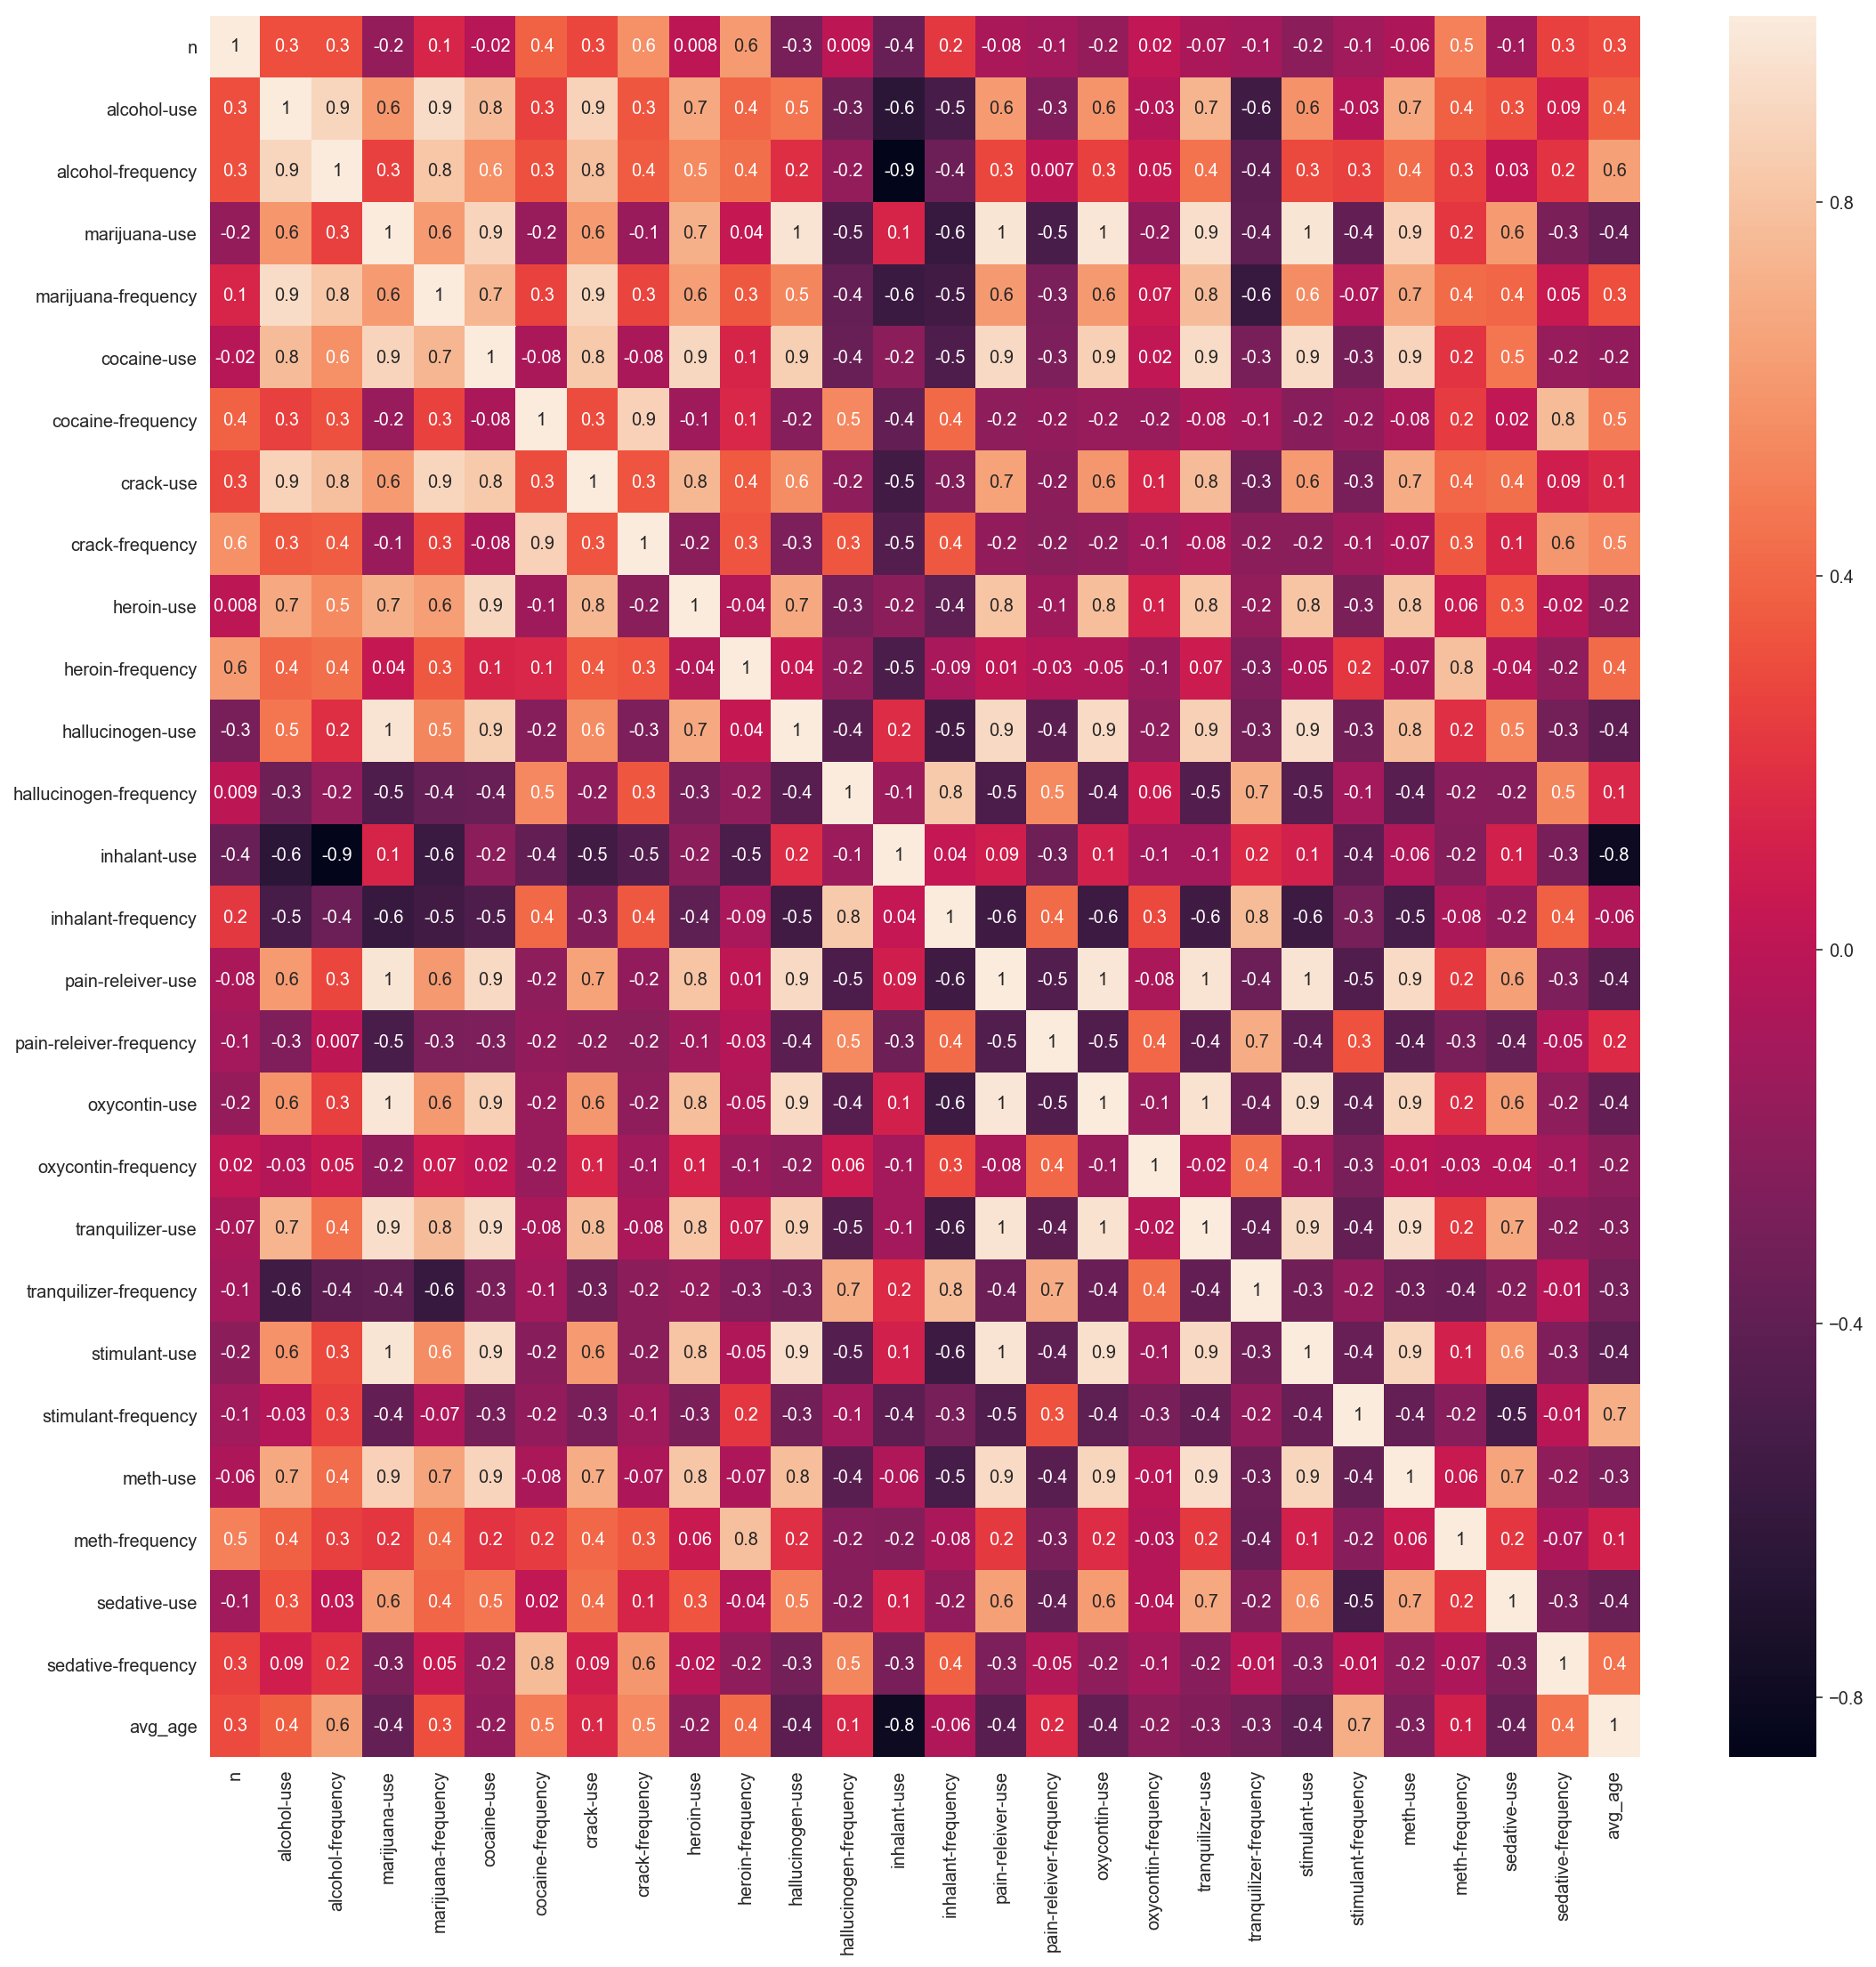

In [40]:
plt.figure(figsize= (18,18))
sns.set_style('darkgrid')
sns.heatmap(drugs_correlation, annot=True,fmt='.1g')

In [41]:
drug_cor_use=drugs[['n','avg_age','alcohol-use','marijuana-use','cocaine-use','crack-use','heroin-use',
                    'hallucinogen-use','inhalant-use','pain-releiver-use','oxycontin-use','tranquilizer-use',
                    'stimulant-use','meth-use','sedative-use']].corr()

In [42]:
drug_cor_use[0:2].T

,n,avg_age
n,1.000000,0.296561
avg_age,0.296561,1.000000
alcohol-use,0.310512,0.367742
marijuana-use,-0.169007,-0.380299
cocaine-use,-0.021565,-0.186837
crack-use,0.281797,0.148656
heroin-use,0.007798,-0.200053
hallucinogen-use,-0.295302,-0.417828
inhalant-use,-0.368395,-0.803968
pain-releiver-use,-0.083587,-0.438547


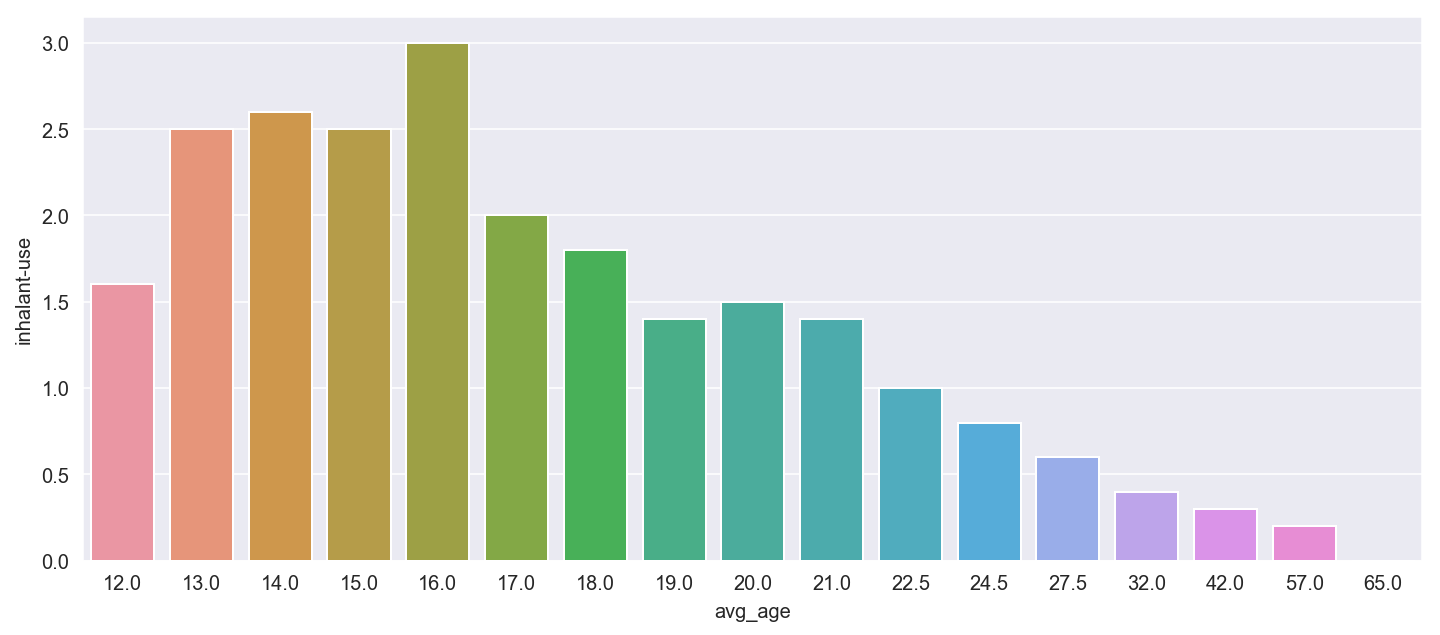

In [43]:
ax = plt.subplots(figsize = (12, 5))
sns.barplot(x = drugs['avg_age'], y = drugs['inhalant-use'])

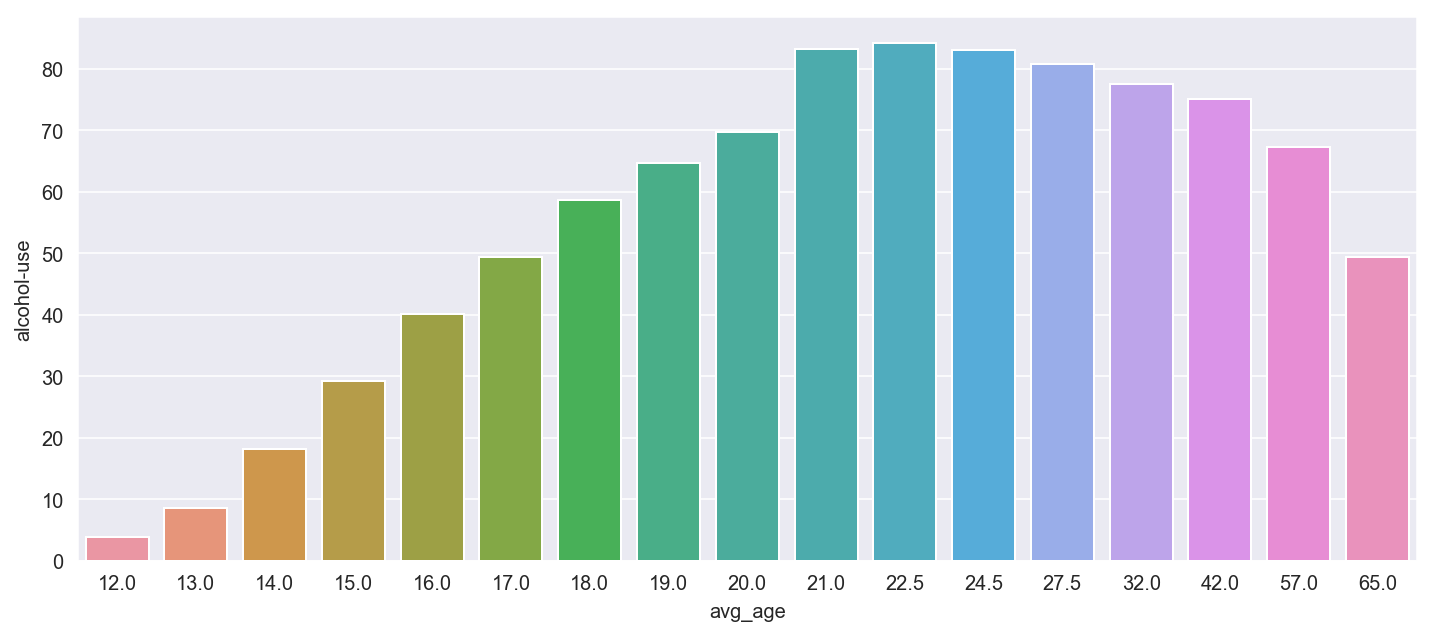

In [44]:
ax = plt.subplots(figsize = (12, 5))
sns.barplot(x = drugs['avg_age'], y = drugs['alcohol-use'])

In [45]:
drug_cor_freq=drugs[['n','avg_age','alcohol-frequency','marijuana-frequency','cocaine-frequency','crack-frequency', 
                    'heroin-frequency','hallucinogen-frequency', 'inhalant-frequency','pain-releiver-frequency',
                    'oxycontin-frequency',  'tranquilizer-frequency','stimulant-frequency',  'meth-frequency',
                    'sedative-frequency']].corr()

In [46]:
drug_cor_freq[0:2].T

,n,avg_age
n,1.000000,0.296561
avg_age,0.296561,1.000000
alcohol-frequency,0.313431,0.642166
marijuana-frequency,0.135597,0.311873
cocaine-frequency,0.388318,0.494470
crack-frequency,0.574629,0.537168
heroin-frequency,0.617432,0.417473
hallucinogen-frequency,0.008743,0.140999
inhalant-frequency,0.227391,-0.057156
pain-releiver-frequency,-0.112076,0.156154


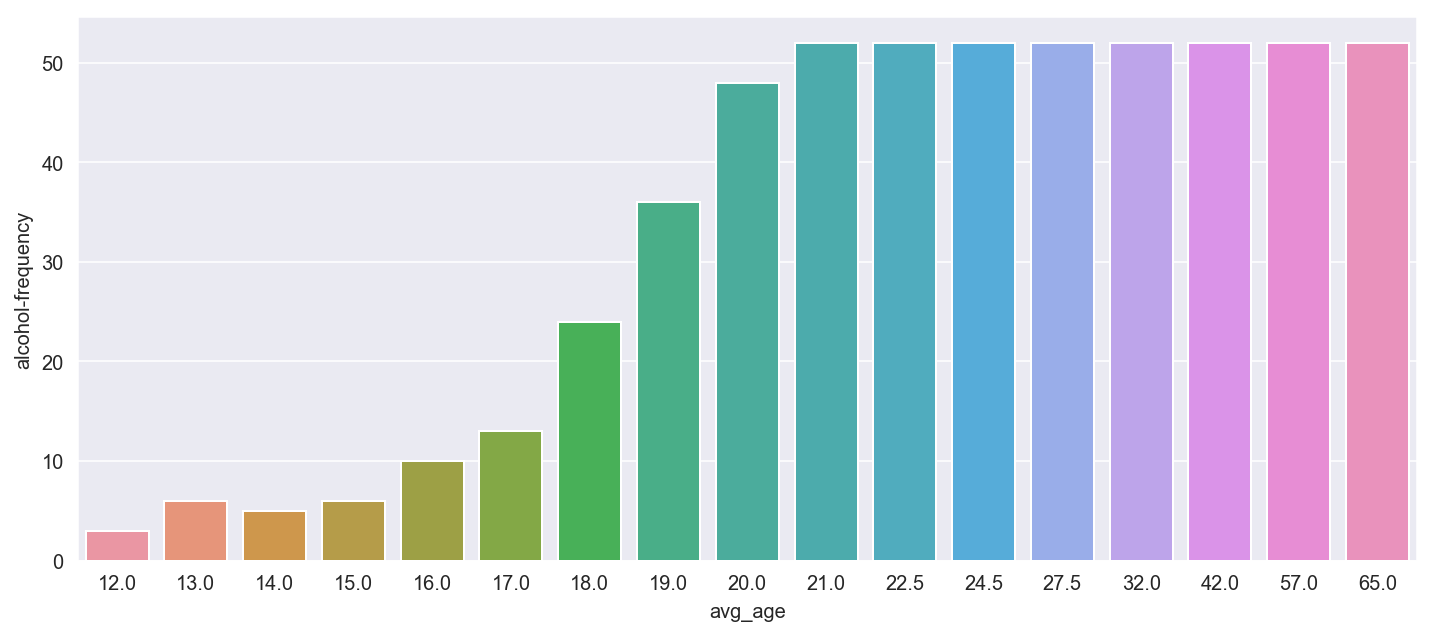

In [47]:
ax = plt.subplots(figsize = (12, 5))
sns.barplot(x = drugs['avg_age'], y = drugs['alcohol-frequency'])

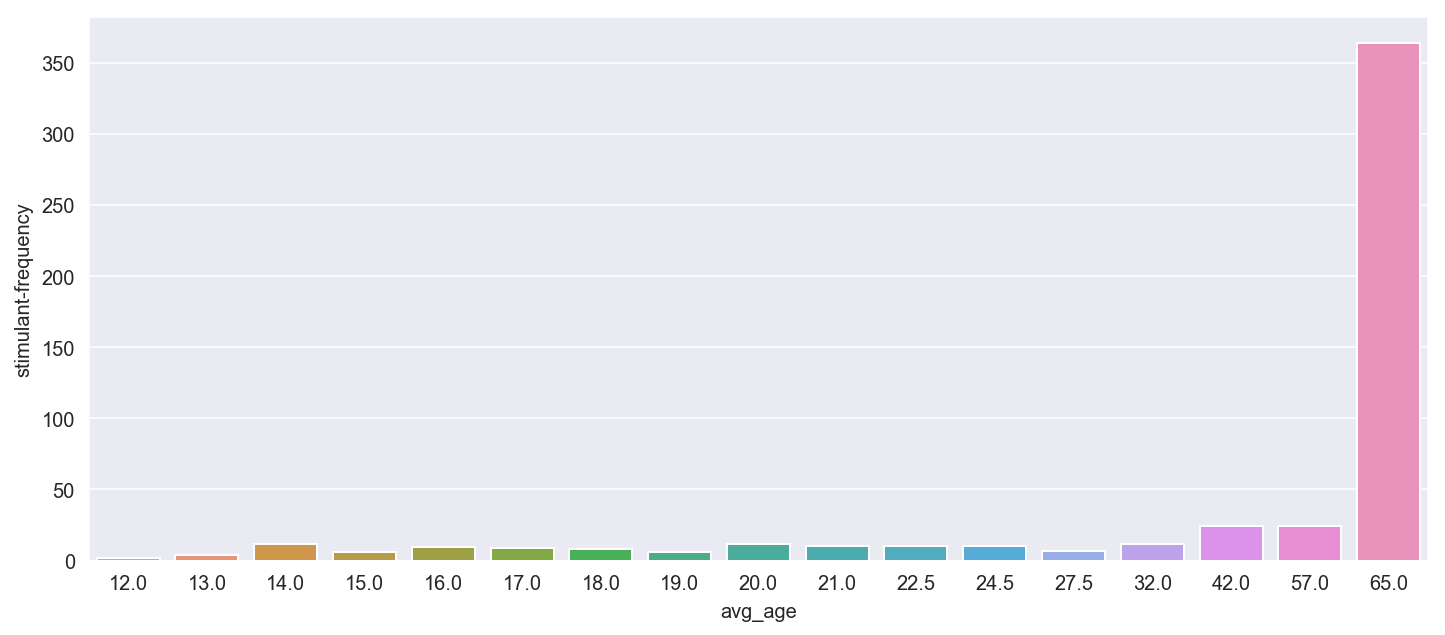

In [48]:
ax = plt.subplots(figsize = (12, 5))
sns.barplot(x = drugs['avg_age'], y = drugs['stimulant-frequency'])

alcohol frequency is positively correlated with avg_age it can be seen with growing age the alcohol frequency increases. But surprisingly the avg age has a strong positive correlation with stimulant-frequency but in the above graph its just that the avg age of 65 and above has a high frequency of stimulants.


**heroin , marijuana and alcohol have the highest frequency of intake.**

#### SPLITTING THE DATASET INTO TWO DATASETS DRUG-USE and DRUG-FREQ

In [51]:
# I have split the dataset into two parts the use and frequency of various drugs

#### DRUG-USE

In [49]:
# Use--Percentage of those in an age group who used the particular drug in the past 12 months
drugs_use = drugs[['age','n','alcohol-use','marijuana-use','cocaine-use','crack-use',
                   'heroin-use','hallucinogen-use','inhalant-use','pain-releiver-use','oxycontin-use',
                   'tranquilizer-use','stimulant-use','meth-use','sedative-use','avg_age']]

drugs_use.head()

,age,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,avg_age
0,12,2798,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2,12.0
1,13,2757,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1,13.0
2,14,2792,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2,14.0
3,15,2956,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4,15.0
4,16,3058,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2,16.0


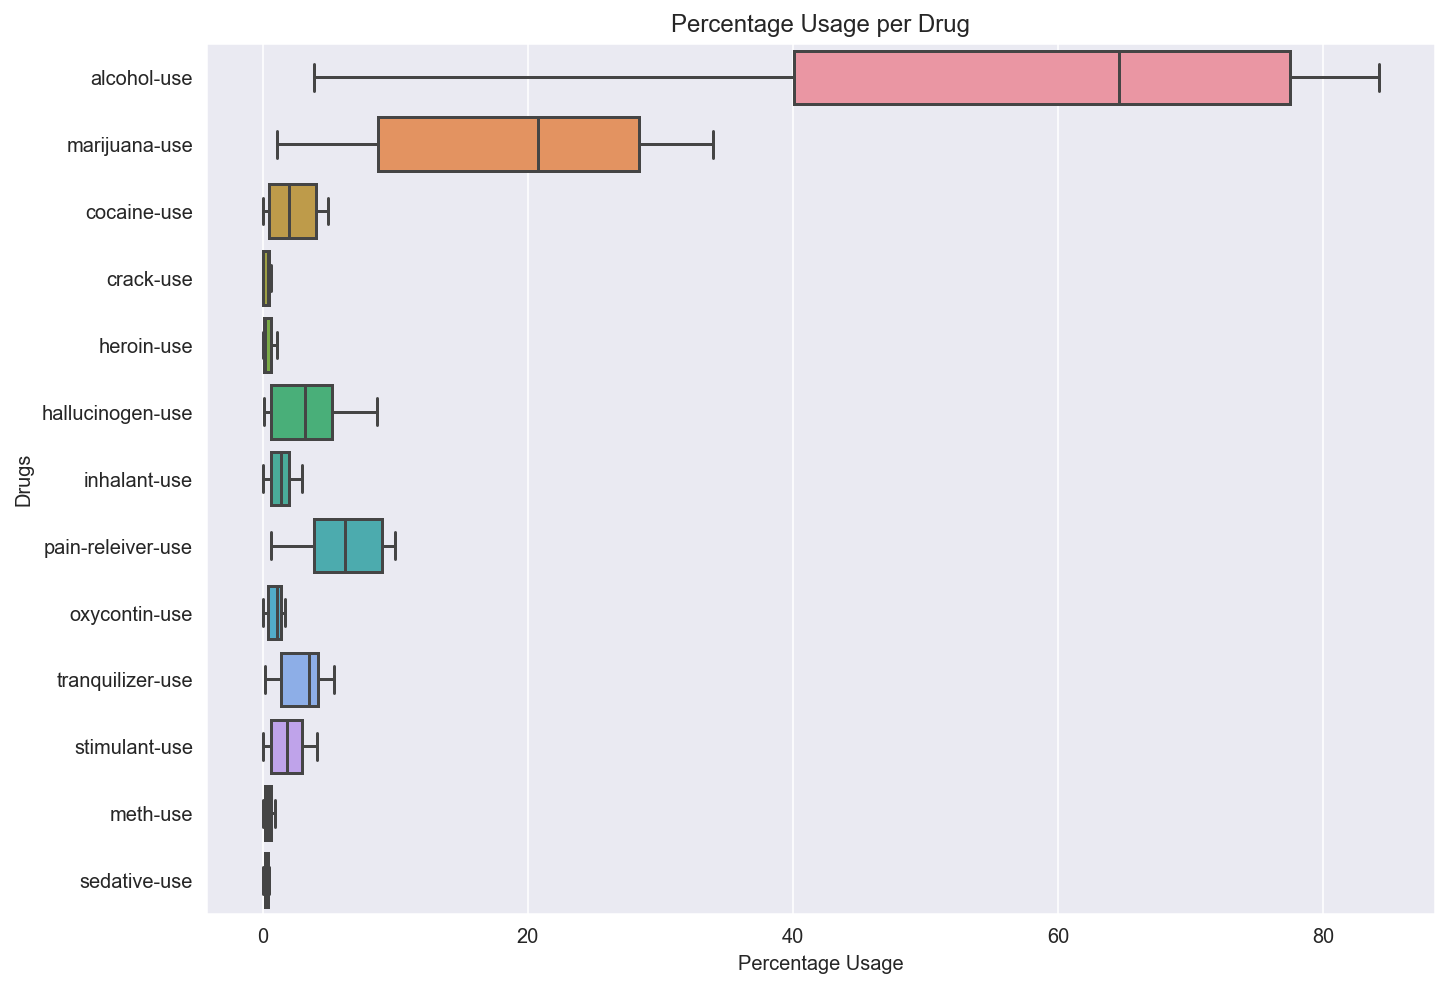

In [50]:
# DRUG USE
plt.figure(figsize= (11,8))
sns.set_style('darkgrid')
sns.boxplot(data = drugs_use.iloc[:,2:15], orient= 'h');
plt.title('Percentage Usage per Drug')
plt.xlabel('Percentage Usage')
plt.ylabel('Drugs');

Text(0, 0.5, 'Percentage of Use')

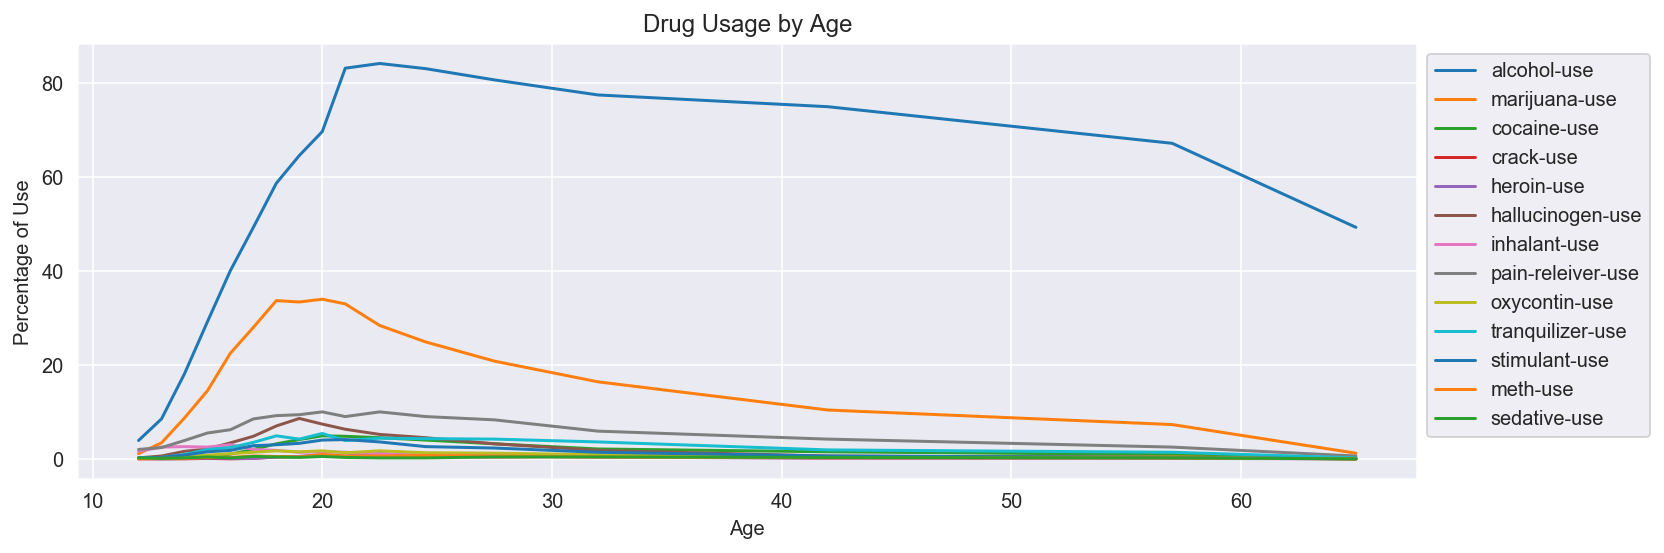

In [51]:
# Set up axes, plot. 
fig, ax = plt.subplots()
drugs_use.iloc[:,2:].plot(x='avg_age', figsize=(12,4), ax=ax)
plt.legend(bbox_to_anchor= (1,1))

plt.title('Drug Usage by Age')
plt.xlabel('Age')
plt.ylabel('Percentage of Use')

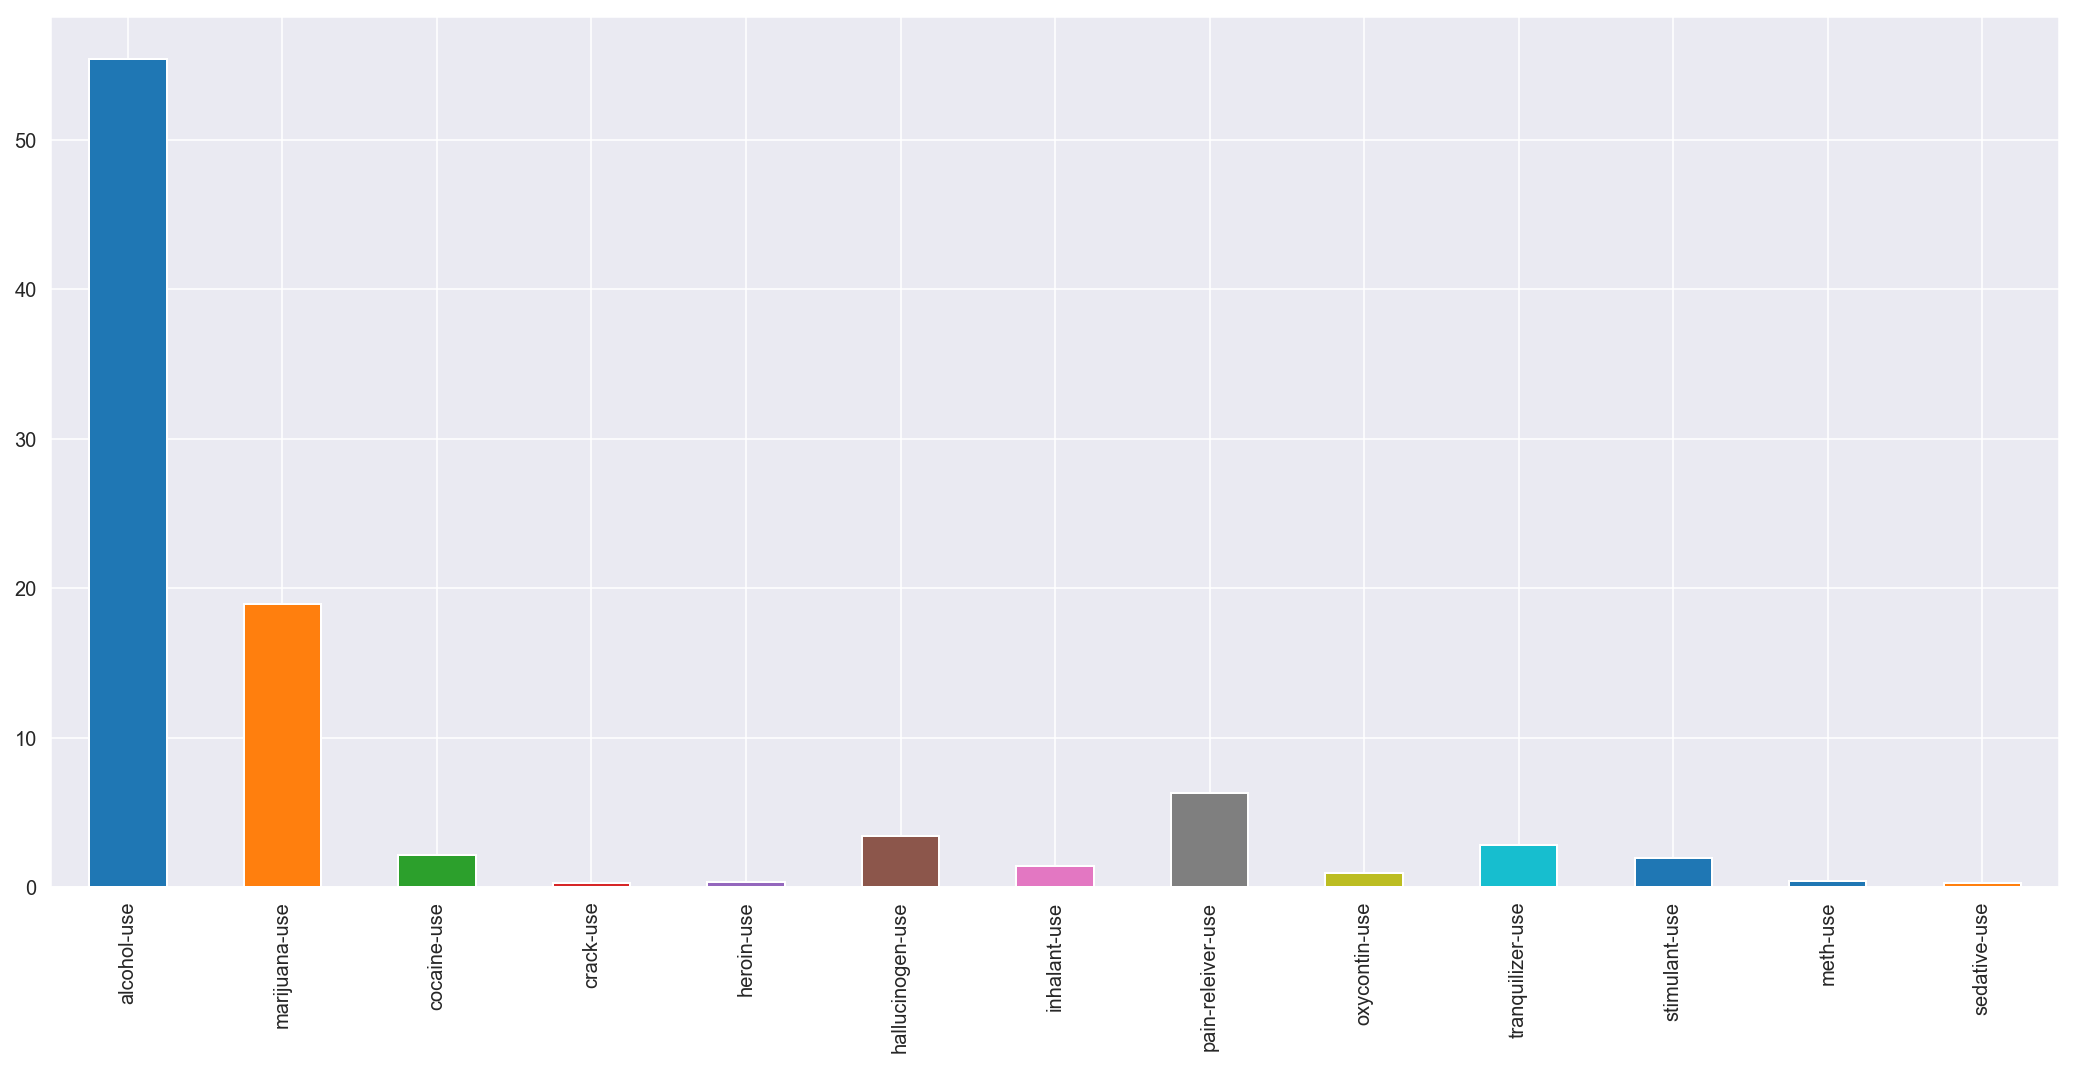

In [52]:
drugs_use[['alcohol-use','marijuana-use','cocaine-use','crack-use','heroin-use','hallucinogen-use',
           'inhalant-use','pain-releiver-use','oxycontin-use','tranquilizer-use','stimulant-use',
           'meth-use','sedative-use']].mean().plot(kind='bar', figsize=(18, 8))

**alcohol, marijuna and pain-releiver have a high usage.**

#### DRUG-FREQ

In [53]:
#Frequency--Median number of times a user in an age group used the particular drug in the past 12 months

drugs_freq = drugs[['age', 'n', 'alcohol-frequency','marijuana-frequency','cocaine-frequency', 'crack-frequency', 
                    'heroin-frequency','hallucinogen-frequency', 'inhalant-frequency','pain-releiver-frequency',
                    'oxycontin-frequency',  'tranquilizer-frequency','stimulant-frequency',  'meth-frequency',
                    'sedative-frequency','avg_age']]


drugs_freq.tail()

,age,n,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency,avg_age
12,26-29,2628,52.0,52.0,5.0,6.0,50.0,3.0,4.0,13.0,13.5,10.0,7.0,30.0,4.0,27.5
13,30-34,2864,52.0,72.0,8.0,15.0,66.0,2.0,3.5,22.0,46.0,8.0,12.0,54.0,10.0,32.0
14,35-49,7391,52.0,48.0,15.0,48.0,280.0,3.0,10.0,12.0,12.0,6.0,24.0,104.0,10.0,42.0
15,50-64,3923,52.0,52.0,36.0,62.0,41.0,44.0,13.5,12.0,5.0,10.0,24.0,30.0,104.0,57.0
16,65+,2448,52.0,36.0,0.0,0.0,120.0,2.0,0.0,24.0,0.0,5.0,364.0,0.0,15.0,65.0


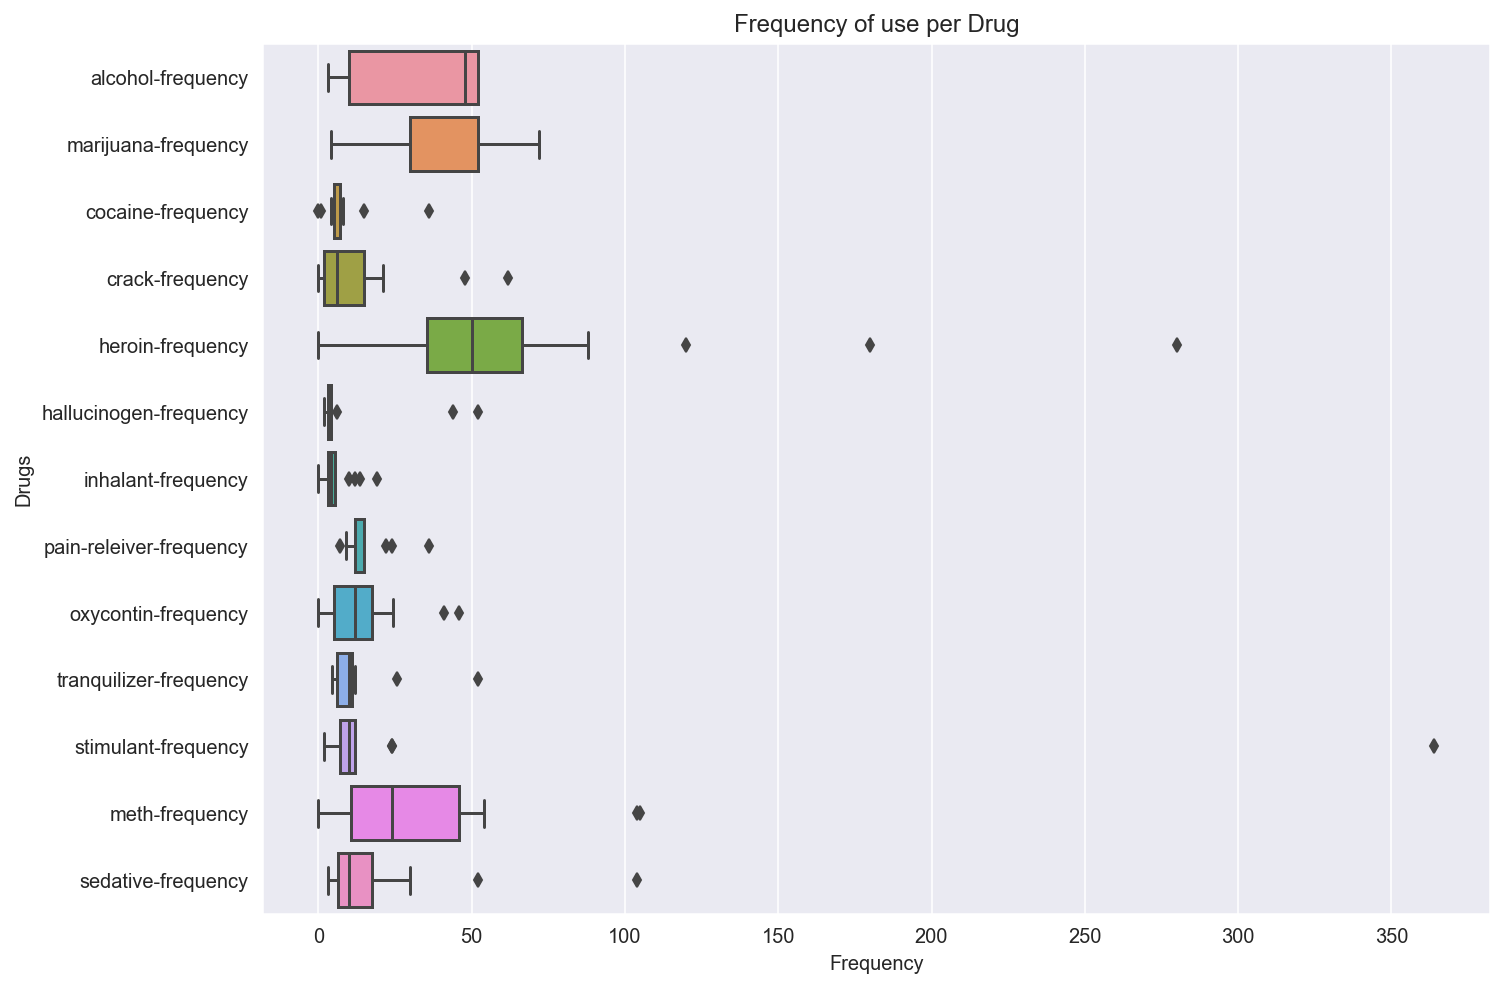

In [54]:
#DRUG FREQ
plt.figure(figsize= (11,8))
sns.set_style("darkgrid")
sns.boxplot(data = drugs_freq.iloc[:,2:15], orient= 'h');
plt.title('Frequency of use per Drug')
plt.xlabel('Frequency')
plt.ylabel('Drugs');

Text(0, 0.5, 'Frequency of drug Intake')

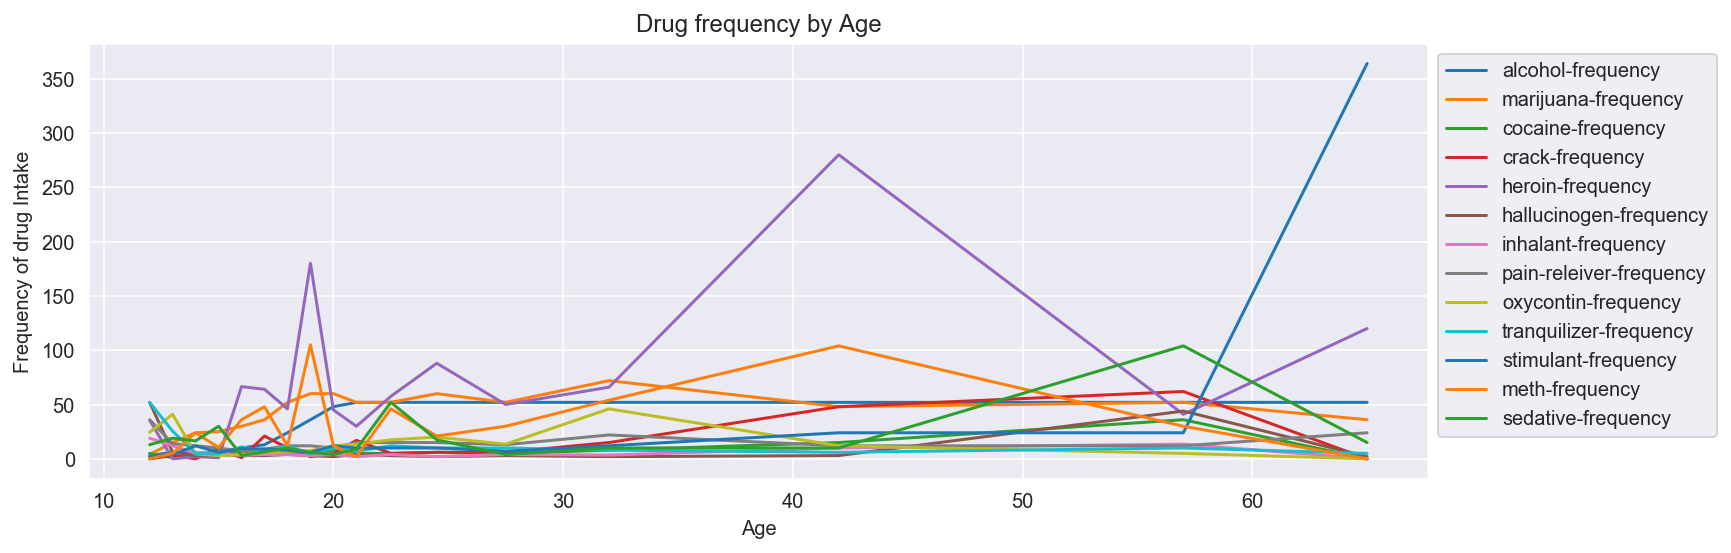

In [55]:
fig,ax= plt.subplots()
drugs_freq.iloc[:,2:].plot(x='avg_age',figsize=(12,4),ax=ax)
plt.legend(bbox_to_anchor=(1,1))

plt.title('Drug frequency by Age')
plt.xlabel('Age')
plt.ylabel('Frequency of drug Intake')

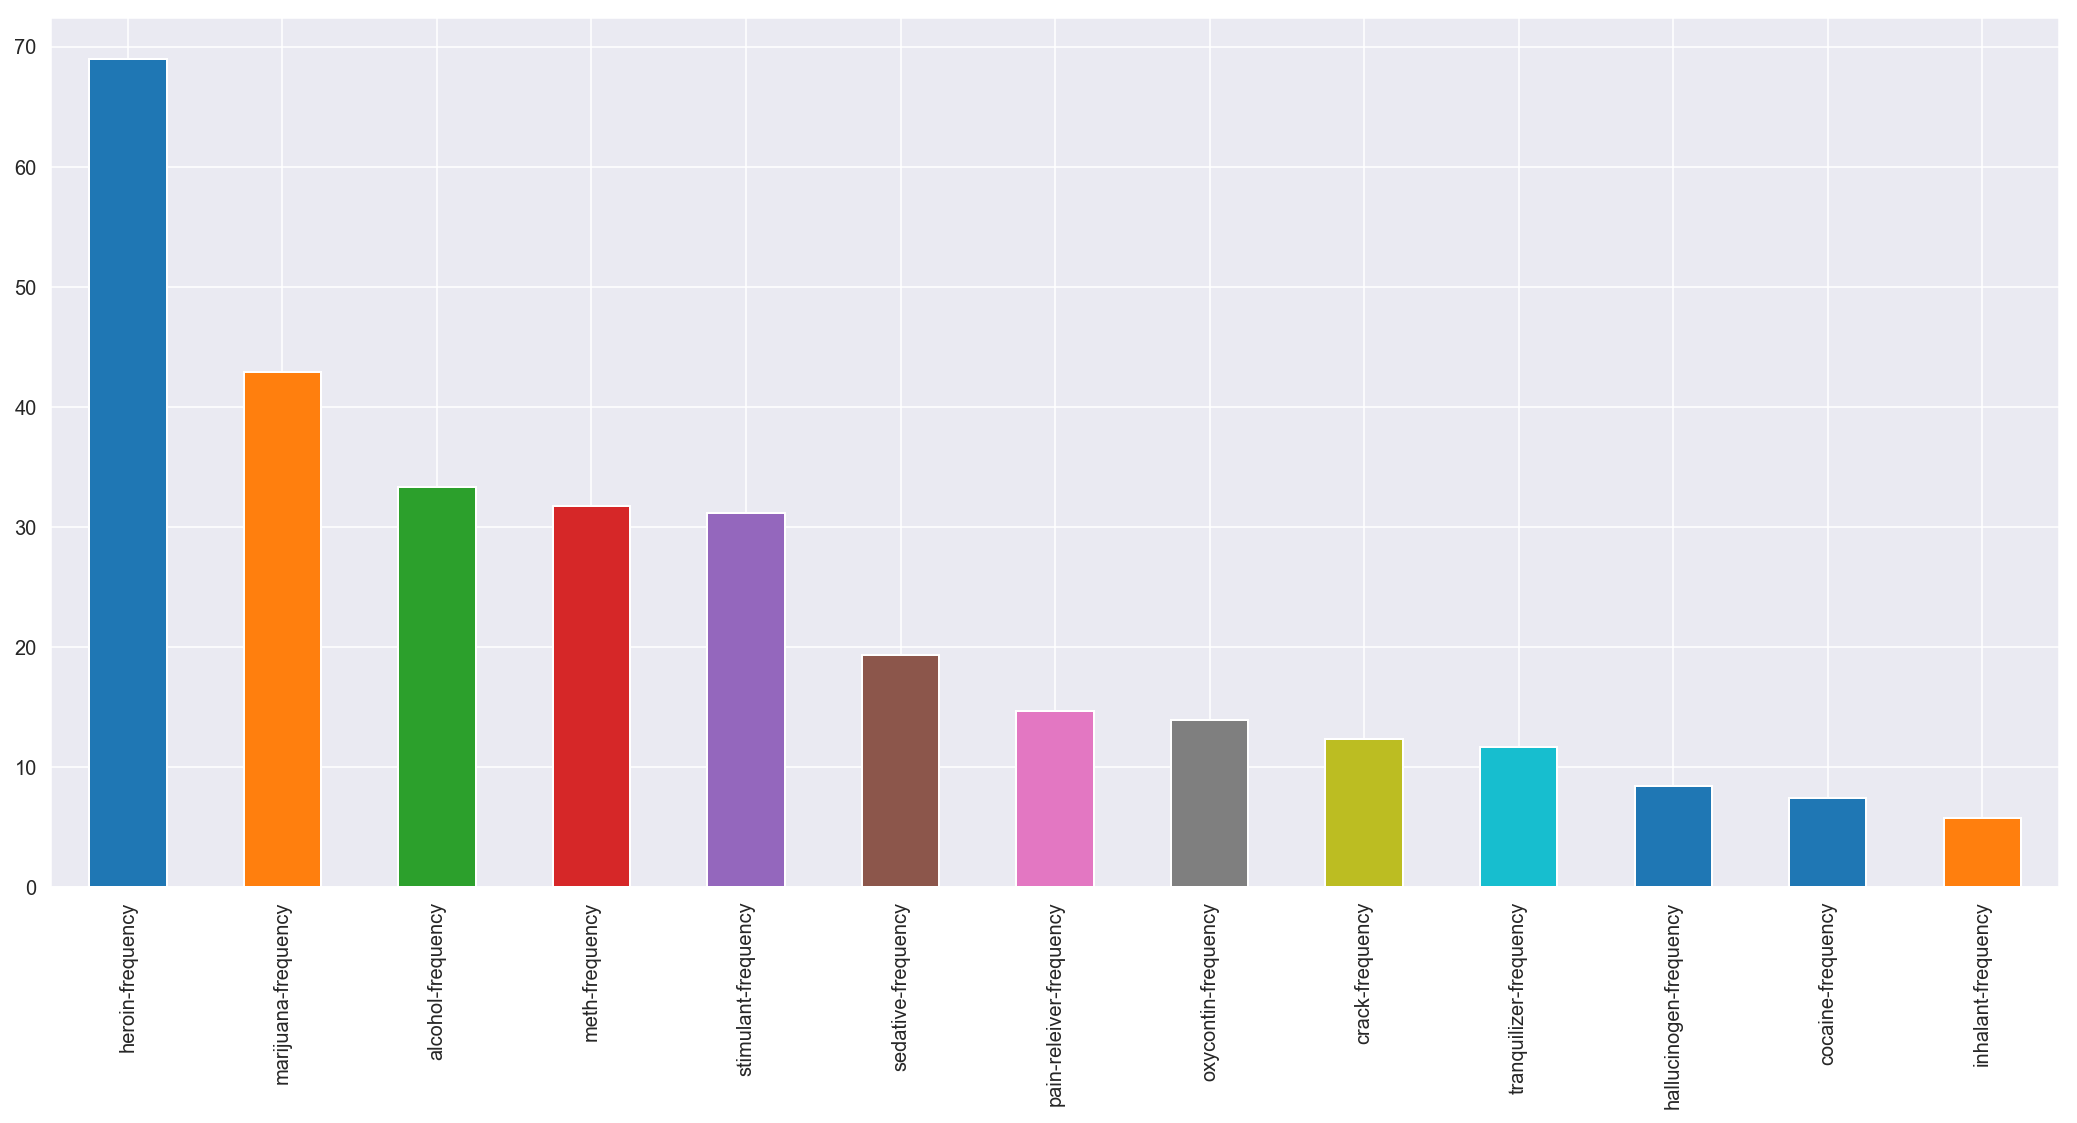

In [56]:
drugs_freq[['alcohol-frequency','marijuana-frequency','cocaine-frequency', 'crack-frequency', 
                    'heroin-frequency','hallucinogen-frequency', 'inhalant-frequency','pain-releiver-frequency',
                    'oxycontin-frequency',  'tranquilizer-frequency','stimulant-frequency',  'meth-frequency',
                    'sedative-frequency']].mean().sort_values(ascending=False).plot(kind='bar', figsize=(18, 8))

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [57]:
drugs[['cocaine-use','heroin-use']].describe()

,cocaine-use,heroin-use
count,17.000000,17.000000
mean,2.176471,0.352941
std,1.816772,0.333762
min,0.000000,0.000000
25%,0.500000,0.100000
50%,2.000000,0.200000
75%,4.000000,0.600000
max,4.900000,1.100000


In [58]:
## Step 2: alpha = 0.05.
alpha = 0.05
   

In [59]:
cocaine=drugs['cocaine-use']
heroin=drugs['heroin-use']
t_test = ttest_ind(cocaine,heroin)
print(t_test)

p_value= t_test[1]

if p_value < alpha/2:
    print("We reject our null hypothesis and conclude that the means usage of cocaine and heroine are different.")
elif p_value > alpha/2:
    print("We fail to reject our null hypothesis and cannot conclude that they are have different means .")
else:
    print("Our test is inconclusive.")

Ttest_indResult(statistic=4.07032397743335, pvalue=0.0002873196652230629)
We reject our null hypothesis and conclude that the means usage of cocaine and heroine are different.


**Report**

The top 3 drugs uses are Alcohol, Marijuana and Pain Relievers.The trend is showing that the drug uses starts to increase in their teenage years i.e. Alcohol usage is skewed, there are youngsters who have alcohol and it can be seen its usage increases after 18.For Marijuana when it is considered illegal , but still legal in some parts. This could be the reasons why it is ranked seconds
